In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from PIL import Image
from sklearn.datasets import make_blobs

In [2]:
%run kmeans

# The exploration and implementation of K-Means and K-Means ++

- K-means is a cluster analysis method, which is the process of grouping data objects into k clusters so that objects in the same cluster have a high degree of similarity in each other, while objects in different clusters are more different from each other. Here, k describes the number of clusters which is the same as the number of centroids.

## Steps of K-means Algorithm

- Step 1: Choose k initial centroids randomly.
- Step 2: For each data point, calculate its distance (i.e., Euclidean distance) from each existing centroid, then assign each data point to the nearest cluster.
- Step 3: Re-calculate the centroid (mean point) for each cluster.
- Step 4: Repeat step 2 and 3 till the position of each centroid no longer changes.

Let's beginning to have some insight into this concept. We first generate some fake data and visualize it!

Text(0.5, 1.0, 'Figure 1.1')

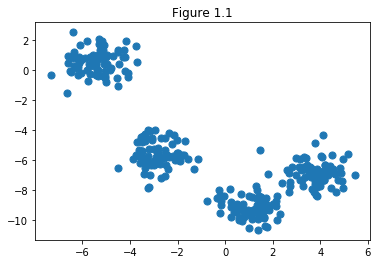

In [3]:
X, y_true = make_blobs(n_samples=300, centers=4,cluster_std=0.80, random_state=16)
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title('Figure 1.1')

In this example (Figure 1.1), it's relatively easy to pick the four centroids by eyes as each point is closer to it own cluster. Let's see what k-means algorithm tells us the centroids and clusters.

Text(0.5, 1.0, 'Figure 1.2')

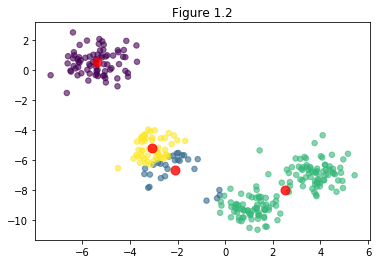

In [4]:
centroids, clusters = kmeans(X, k=4, centroids=None)
flat_idx = [item for sublist in clusters for item in sublist]
my_cluster = []
for cluster_idx, indexes in enumerate(clusters):
    for index in indexes:
        my_cluster.append(cluster_idx)
plt.scatter(X[flat_idx, 0], X[flat_idx, 1], c= my_cluster, s=30, cmap='viridis',alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=80, alpha=0.8)
plt.title('Figure 1.2')

## One drawback of the K-means algorithm

One drawback of the K-means algorithm is that it is sensitive to the initialization of the centroids. In this example, more than one centroid is initialized to the same cluster, resulting in the actual cluster is blended with another cluster. A poor initialization of centroids result in poor clustering.

That's why the K-means algorithm output shown in Figure 1.2 is not what we expected.

In K-means process, when we randomly initialize centroids, we have no control over the initial positions. But it is important to initially select the centroids fairly apart.

##  How to better choose k initial centroids ? 

- 'K-means++' initial centroid identification algorithm

Instead, we use 'K-means++' initial centroid identification algorithm to pick the K centroids. We initially select one random centroid. Assuming that n initial centroids have been selected (0<n<K), the point (n+1<sup>st</sup> centroid) that is further from the current n centroids tends to have a higher probability of being selected as the n+1<sup>st</sup> centroid. Therefore, the points within one cluster can be as tightly connected as possible, and the distance between clusters can be as large as possible.

## Steps of K-means ++ Algorithm
- Step 1: Choose the first initial centroids randomly.
- Step 2: For each data point, calculate its distance (i.e., Euclidean distance) from the nearest centroid as the min distance. The point tends to have higher possibilities to be the next centroid if the point has the max (farthest) distance among the min distances to a cluster.
- Step 3: Repeat step 2 till all k centroid are picked.

Now in Figure 1.3, the clusters and centroids perform well.

Text(0.5, 1.0, 'Figure 1.3')

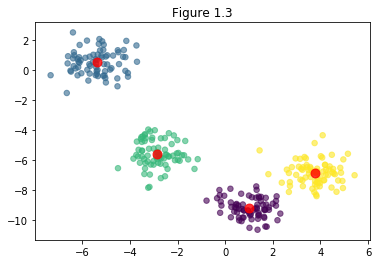

In [5]:
centroids, clusters = kmeans(X, k=4, centroids='kmeans++')
flat_idx = [item for sublist in clusters for item in sublist]
my_cluster = []
for cluster_idx, indexes in enumerate(clusters):
    for index in indexes:
        my_cluster.append(cluster_idx)
plt.scatter(X[flat_idx, 0], X[flat_idx, 1], c= my_cluster, s=30, cmap='viridis',alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=80, alpha=0.8)
plt.title('Figure 1.3')

# Image compression using K-means clustering

We can apply K-means clustering to compress image by grouping similar colors into k clusters, which is to reduce the number of colors in one image. For each centroid, it will represent one color (a RGB value) and replace all other colors in their respective clusters.

## Convert a grey picture

Let's first start to convert one grey picture and reduce the color to 4 kinds.

### Steps of image compression
- Step 1: Convert one image to a 2D array
- Step 2: Find k clusters based on the K-mean++ algorithm and reduce the number of colors in one image 
- Step 3: Reshape array to the image

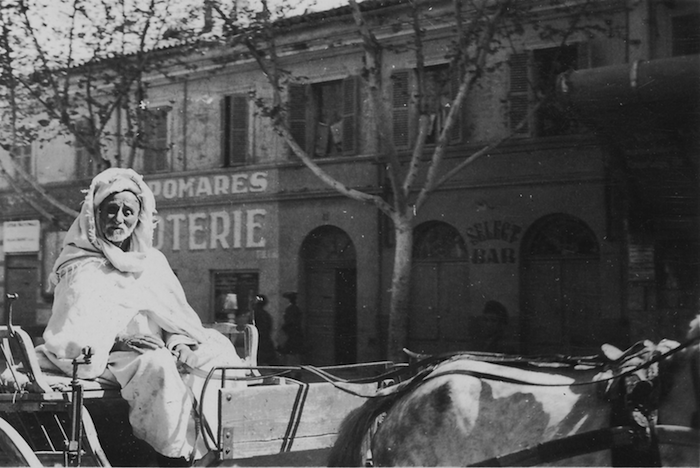

In [6]:
grey = Image.open('north-africa-1940s-grey.png')
grey 

In [7]:
width,height = grey.size
colors = grey.getcolors(width*height)
num_colors = len(colors) 
num_pixels = width*height
print ('Number of pixels = ', num_pixels)
print ('Number of colors = ', num_colors)

Number of pixels =  327600
Number of colors =  217


In [8]:
grey_array = np.array(grey)
grey_reshape = grey_array.reshape(-1).reshape(-1, 1).astype(float)
print(np.array(grey).shape) 

(468, 700)


In [9]:
centroids, clusters = kmeans(grey_reshape, k = 4, centroids='kmeans++')

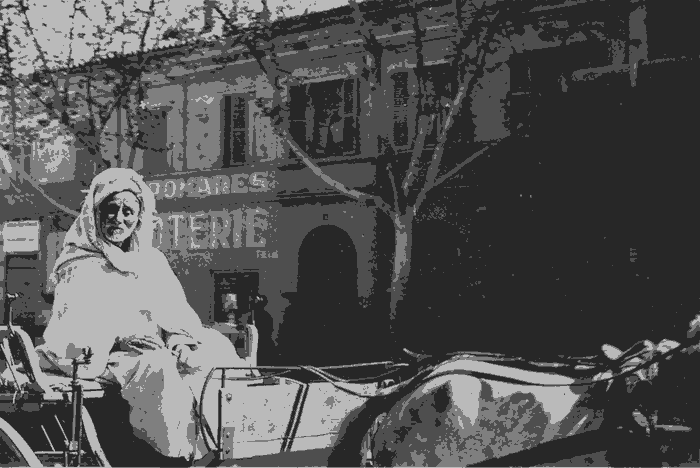

In [10]:
for i in range(len(centroids)):
    grey_reshape[clusters[i]] = centroids[i]
array_after = grey_reshape.astype(np.uint8).reshape(grey_array.shape)
Image.fromarray(array_after, 'L')

## Convert a colorful picture

These are the two dogs adopted by my favorite Youtuber Kelly Yang. The one on the left in the picture is called Nana and the one on the right is called Elle.

I'm planning to covert this picture with only 5 colors.

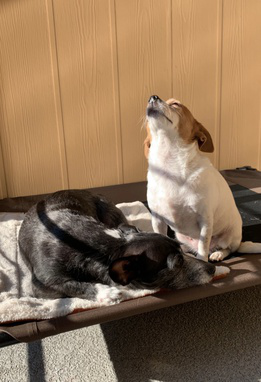

In [11]:
import math
dog = Image.open('elle&nana.jpg')
dog

A colorful image can be represented as 3 seperate matrics for colors RGB (Red,Green,Blue) while a grey scale image only has 1 matric.

In [12]:
print('shape:',np.array(dog).shape)

shape: (382, 261, 3)


In [13]:
width, height = dog.size
colors = dog.getcolors(width * height)
num_colors = len(colors) 
num_pixels = width * height

print ('Number of pixels = ', num_pixels)
print ('Number of colors = ', num_colors)

Number of pixels =  99702
Number of colors =  19562


In [14]:
dog_array = np.array(dog).astype('int')
dog_reshape = dog_array.reshape(-1).reshape(-1, 3).astype(float)

In [15]:
centroids, clusters = kmeans(dog_reshape, k = 5, centroids='kmeans++', tolerance=1e-2)

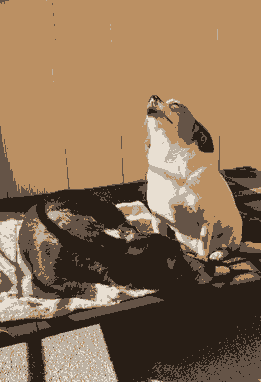

In [16]:
for i in range(len(centroids)):
    dog_reshape[clusters[i]] = centroids[i]
array_after = dog_reshape.astype(np.uint8).reshape(dog_array.shape)
Image.fromarray(array_after)

# K-means other applications

- using RFs to compute similarity matrices 
- Breiman's RF for unsupervised learning trick